In [181]:
import pandas as pd
import numpy as np
import inspect
import seaborn as sns 
import matplotlib.pyplot as plt
import networkx as nx



#from datetime import timedelta

def list_columns(df):
    for col in df: 
        print(col, end='   ')

def row_count(df):
    return len(df)

pg_1 = 'ggplot'
pg_2 = 'bmh'
pg_3 = 'Solarize_Light2'
pg_4 = 'classic'
pg = pg_4

In [182]:
df1 = pd.read_csv('Shekar-Dataset-1/last_week.csv', index_col=0) 
df2 = pd.read_csv('Shekar-Dataset-1/station_info.csv', index_col=0)

In [183]:
df1.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day
ride_id,,,,,,,,,,,,,
B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25
6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22
7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22
18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26
294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22


In [184]:
# https://www.semicolonworld.com/question/54955/mapping-columns-from-one-dataframe-to-another-to-create-a-new-column

df1['capacity_start_station'] = df1.start_station_name.map(dict(df2[['Name', 'Capacity']].values))
df1['capacity_end_station'] = df1.end_station_name.map(dict(df2[['Name', 'Capacity']].values))

df1['started_at'] = pd.to_datetime(df1['started_at'], format='%Y-%m-%d %H:%M:%S')# <-- How to change the datetime format to '%d.%m.%Y'| Use in a new line of code: dt.strftime('%m/%d/%Y')
df1['ended_at'] = pd.to_datetime(df1['ended_at'], format='%Y-%m-%d %H:%M:%S')

df1['day'] = pd.to_datetime(df1['day'], format='%Y-%m-%d')

df1['start_hour'] = df1['started_at'].dt.hour
df1['end_hour'] = df1['started_at'].dt.hour

df1['rental_duration'] = df1['ended_at']-df1['started_at']
df1['rental_duration_minutes'] = df1['rental_duration'].dt.seconds//60

df1['route_id'] = df1['start_station_id'].astype(str) + df1['end_station_id'].astype(str)
df1['route_name'] = df1['start_station_name'].astype(str) + ' <-> ' + df1['end_station_name'].astype(str)
df1['combined_capacity'] = df1['capacity_start_station']*df1['capacity_end_station']

df1['route_weight_normalized'] = df1['route_name'].map(df1["route_name"].value_counts(normalize=True)) 
df1['route_weight'] = df1['route_name'].map(df1["route_name"].value_counts(normalize=False)) 

df1['cat_day'] = df1['day'].dt.day_name() 



In [185]:
# List missing values

total = df1.isnull().sum().sort_values(ascending=False)
percent_1 = df1.isnull().sum()/df1.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
combined_capacity,7565,13.1
capacity_end_station,5555,9.6
end_station_name,5422,9.4
end_station_id,5422,9.4
capacity_start_station,5150,8.9


In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57934 entries, B3FA23181ADC06FE to 56B80D92A24B8C93
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   rideable_type            57934 non-null  object         
 1   started_at               57934 non-null  datetime64[ns] 
 2   ended_at                 57934 non-null  datetime64[ns] 
 3   start_station_name       52943 non-null  object         
 4   start_station_id         52943 non-null  float64        
 5   end_station_name         52512 non-null  object         
 6   end_station_id           52512 non-null  float64        
 7   start_lat                57934 non-null  float64        
 8   start_lng                57934 non-null  float64        
 9   end_lat                  57848 non-null  float64        
 10  end_lng                  57848 non-null  float64        
 11  member_casual            57934 non-null  object         
 1

In [187]:
# Here we drop all incomplete values
df1_raw = df1
df1 = df1.dropna()


In [188]:
print('Attention!',((row_count(df1_raw)-row_count(df1))/row_count(df1_raw))*100,'% of the inital data has been droped due to missing values!')

Attention! 13.057962509062035 % of the inital data has been droped due to missing values!


In [189]:
# Drop all values with a rental duration les thean 1 minute
df1 = df1.drop(df1[df1.rental_duration_minutes < 1].index)

In [190]:
df = df1 # Chage to use raw data.

In [191]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,start_hour,end_hour,rental_duration,rental_duration_minutes,route_id,route_name,combined_capacity,route_weight_normalized,route_weight,cat_day
ride_id,,,,,,,,,,,,,,,,,,,,,
B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,...,0,0,0 days 00:59:47,59,32035.032061.0,Georgia Ave & Spring St <-> New Hampshire & Ki...,165.0,0.000017,1,Friday
6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,...,6,6,0 days 00:04:56,4,32235.032234.0,Merrifield Cinema & Merrifield Town Center <->...,121.0,0.000017,1,Tuesday
7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,...,22,22,0 days 00:03:11,3,31296.031103.0,Columbia & Ontario Rd NW <-> 15th & Harvard St NW,529.0,0.000138,8,Tuesday
18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,...,20,20,0 days 01:54:32,114,31638.031638.0,1st & H St NW <-> 1st & H St NW,225.0,0.000224,13,Saturday
294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,...,20,20,0 days 00:09:46,9,31600.031267.0,5th & K St NW <-> 17th St & Massachusetts Ave NW,361.0,0.000035,2,Tuesday


### Targeting Road Map

Station | Depature Counts | Arrival Counts

1. Get departure & arrival counts. (Trips per station)
2. Number of trips / station pair (route)
3. Percentage of trips / member type / route.
4. Percentage of trips / bike type.
5. Plot trips / station / day
6. Plot trips / station / member
7. Plot trips / member / day
8. Create a flow map for all stations to get a better understanding of the bike circulation. 

1 & 5 maybe combined

### 1 Departure & Arrival Counts

This still needs some work since it represent the statistic for the whole week. (The could have been an event that lead to an unsual high demand) --> Use groupby('day')....

In [192]:

# Value counts departures
dfd = df.groupby(['start_station_name', 'day']).count()['start_station_id'].reset_index() #df['start_station_name'].value_counts().reset_index() #
dfd.columns  = ['station', 'day', 'count_departure']

# Value counts arrivals
dfa = df.groupby(['end_station_name', 'day']).count()['start_station_id'].reset_index() #df['end_station_name'].value_counts().reset_index() #
dfa.columns  = ['station', 'day', 'count_arrival']

# Meging departue and arrival counts
df_dep_arr = pd.merge(dfa, dfd, how='outer').sort_values(by=['count_arrival', 'count_departure'], ascending=False)

# Lets drop incomplete station pairs
df_dep_arr = df_dep_arr.dropna()

df_dep_arr


,station,day,count_arrival,count_departure
1875,Jefferson Dr & 14th St SW,2021-06-26,210.0,218.0
2009,Lincoln Memorial,2021-06-26,175.0,187.0
1848,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,150.0,148.0
2704,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,149.0,169.0
2008,Lincoln Memorial,2021-06-25,142.0,139.0
...,...,...,...,...
2981,White Oak Transit Center,2021-06-23,1.0,1.0
2982,White Oak Transit Center,2021-06-25,1.0,1.0
2986,Wiehle Ave & Reston Station Blvd,2021-06-26,1.0,1.0
2987,Wilson Blvd & N Edgewood St,2021-06-21,1.0,1.0


In [193]:
data1 = pd.melt(df_dep_arr.head(100), id_vars=['station', 'day'], value_vars=['count_arrival', 'count_departure'])

In [194]:
data1.head(200)

,station,day,variable,value
0,Jefferson Dr & 14th St SW,2021-06-26,count_arrival,210.0
1,Lincoln Memorial,2021-06-26,count_arrival,175.0
2,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,count_arrival,150.0
3,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,count_arrival,149.0
4,Lincoln Memorial,2021-06-25,count_arrival,142.0
...,...,...,...,...
195,1st & K St SE,2021-06-24,count_departure,66.0
196,Georgetown Harbor / 30th St NW,2021-06-26,count_departure,65.0
197,Maine Ave & 9th St SW,2021-06-26,count_departure,65.0
198,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,2021-06-26,count_departure,65.0


### 1.1 Analyze departures & arrivals

In [195]:
data1.loc[data1['station']=='4th St & Madison Dr NW']

,station,day,variable,value
6,4th St & Madison Dr NW,2021-06-26,count_arrival,138.0
7,4th St & Madison Dr NW,2021-06-24,count_arrival,131.0
8,4th St & Madison Dr NW,2021-06-23,count_arrival,125.0
32,4th St & Madison Dr NW,2021-06-25,count_arrival,94.0
50,4th St & Madison Dr NW,2021-06-21,count_arrival,80.0
106,4th St & Madison Dr NW,2021-06-26,count_departure,130.0
107,4th St & Madison Dr NW,2021-06-24,count_departure,129.0
108,4th St & Madison Dr NW,2021-06-23,count_departure,128.0
132,4th St & Madison Dr NW,2021-06-25,count_departure,96.0
150,4th St & Madison Dr NW,2021-06-21,count_departure,86.0


<AxesSubplot:xlabel='day', ylabel='value'>

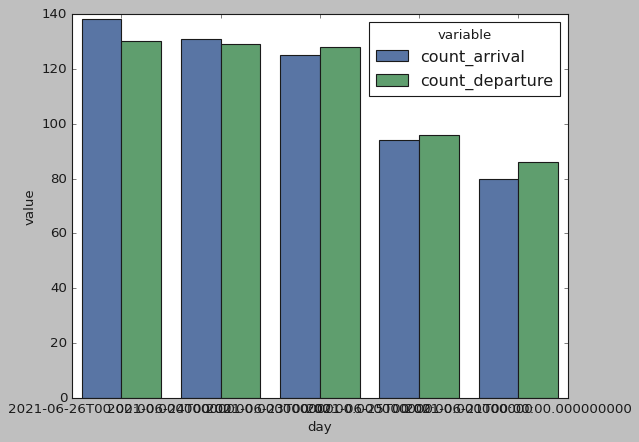

In [196]:
# Using the melt function to reshape the 10 most used staions.
#data = pd.melt(df_dep_arr.head(10), id_vars=['station'], value_vars=['count_arrival', 'count_departure'])
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
#plt.xlim(300, 750)
sns.barplot(y='value', x='day', hue='variable', data=data1.loc[data1['station']=='4th St & Madison Dr NW'])

In [197]:
data1

,station,day,variable,value
0,Jefferson Dr & 14th St SW,2021-06-26,count_arrival,210.0
1,Lincoln Memorial,2021-06-26,count_arrival,175.0
2,Henry Bacon Dr & Lincoln Memorial Circle NW,2021-06-26,count_arrival,150.0
3,Smithsonian-National Mall / Jefferson Dr & 12t...,2021-06-26,count_arrival,149.0
4,Lincoln Memorial,2021-06-25,count_arrival,142.0
...,...,...,...,...
195,1st & K St SE,2021-06-24,count_departure,66.0
196,Georgetown Harbor / 30th St NW,2021-06-26,count_departure,65.0
197,Maine Ave & 9th St SW,2021-06-26,count_departure,65.0
198,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,2021-06-26,count_departure,65.0


In [198]:
# Depature Arrival plots of all stations.

#g = sns.FacetGrid(data1, col="station", row="day")

#g.map_dataframe(sns.barplot, x="day", y="value", hue="variable")

1.2 Oversuplliend and Undersupllied Stations

In [199]:
# Find undesupplied stations

data2 = df_dep_arr
data2['deviation_count'] = data2['count_arrival'] - data2['count_departure']
data2 = data2.loc[(data2.deviation_count < - 0)].sort_values(by=['deviation_count'], ascending=True)

data2.head()

,station,day,count_arrival,count_departure,deviation_count
1331,Columbia & Ontario Rd NW,2021-06-26,38.0,69.0,-31.0
2791,Thomas Circle,2021-06-23,55.0,82.0,-27.0
779,39th & Calvert St NW / Stoddert,2021-06-23,13.0,37.0,-24.0
293,15th & Euclid St NW,2021-06-22,21.0,45.0,-24.0
206,14th & Irving St NW,2021-06-25,39.0,62.0,-23.0


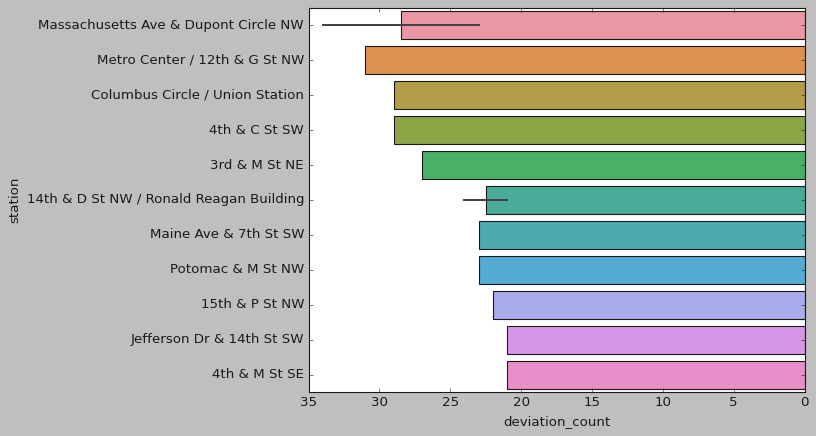

In [222]:
# Why to i have the small lines in my plot?
#sns.set(rc={'figure.figsize':(20,10)}, )
plt.style.use(pg)
#plt.xlim(-35, -15)
sns.barplot(y='station', x='deviation_count',data=data2.head(15)).invert_xaxis()

In [201]:
# Find oversupplied stations 

data2 = df_dep_arr
data2['deviation_count'] = data2['count_arrival'] - data2['count_departure']
data2 = data2.loc[(data2.deviation_count > 20)].sort_values(by=['deviation_count'], ascending=False)

data2.head()

,station,day,count_arrival,count_departure,deviation_count
2108,Massachusetts Ave & Dupont Circle NW,2021-06-24,105.0,71.0,34.0
2124,Metro Center / 12th & G St NW,2021-06-23,61.0,30.0,31.0
1382,Columbus Circle / Union Station,2021-06-24,106.0,77.0,29.0
866,4th & C St SW,2021-06-26,72.0,43.0,29.0
824,3rd & M St NE,2021-06-26,111.0,84.0,27.0


<AxesSubplot:xlabel='deviation_count', ylabel='station'>

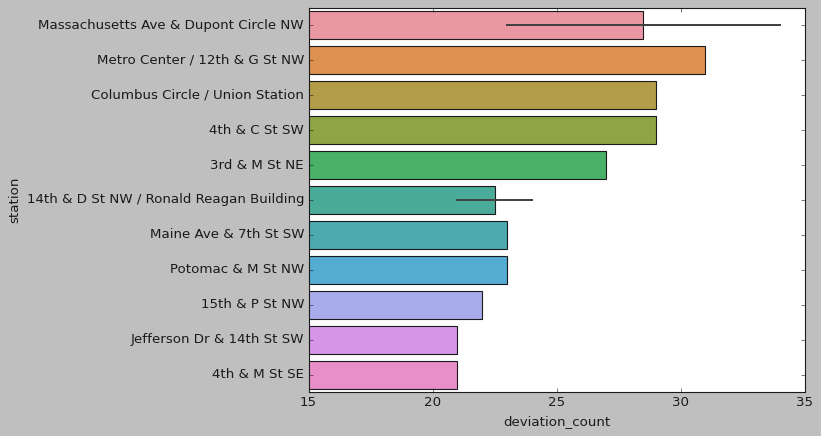

In [202]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
plt.xlim(15, 35)
sns.barplot(y='station', x='deviation_count',data=data2.head(15))#.invert_xaxis()

### 2. Number of trips / station pair (route)



In [203]:
list_columns(df)

rideable_type   started_at   ended_at   start_station_name   start_station_id   end_station_name   end_station_id   start_lat   start_lng   end_lat   end_lng   member_casual   day   capacity_start_station   capacity_end_station   start_hour   end_hour   rental_duration   rental_duration_minutes   route_id   route_name   combined_capacity   route_weight_normalized   route_weight   cat_day   

In [204]:
data3 = df['route_name'].value_counts().reset_index()
data3.columns = ['routes', 'value_counts']
route_weight = data3 # Important for further features

data3.head()

,routes,value_counts
0,Jefferson Dr & 14th St SW <-> Jefferson Dr & 1...,165
1,Smithsonian-National Mall / Jefferson Dr & 12t...,116
2,4th St & Madison Dr NW <-> 4th St & Madison Dr NW,83
3,Lincoln Memorial <-> Lincoln Memorial,78
4,17th St & Independence Ave SW <-> 17th St & In...,77


In [205]:
data3.shape

(21173, 2)

<AxesSubplot:xlabel='value_counts', ylabel='routes'>

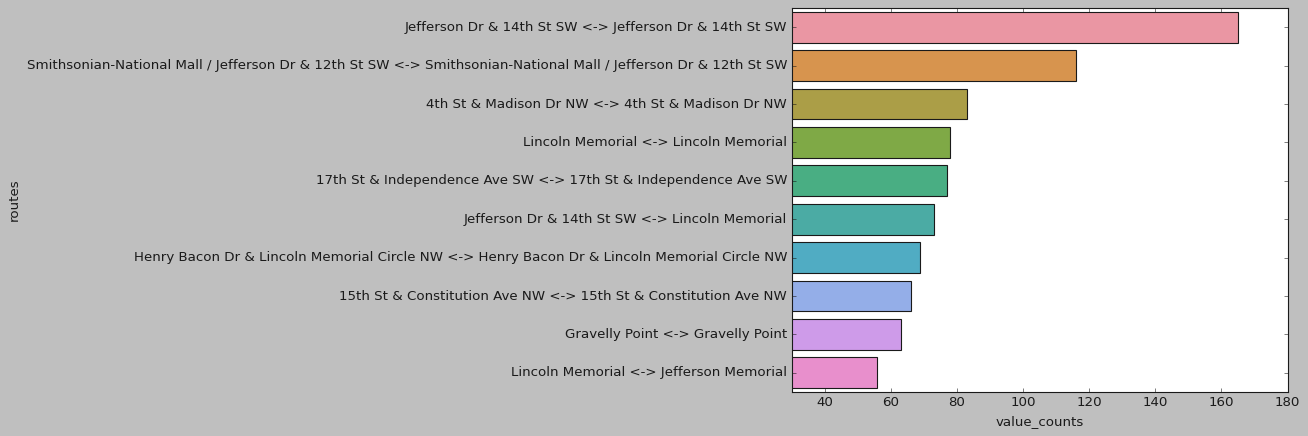

In [206]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg)
plt.xlim(30, 180)
sns.barplot(y='routes', x='value_counts', data=data3.head(10))

### 2.1 Bike Flow Visualization

In [207]:
network1 = df[['start_station_name','end_station_name']].reset_index(drop=True)

#network2 = network1.loc[network1['end_station_name'] == network1['start_station_name']]

#for every route in end_station_name that is == to start_station_name 

network2 = network1.loc[network1['end_station_name'] == network1['start_station_name']]







In [208]:
network2.head(40)

,start_station_name,end_station_name
3,1st & H St NW,1st & H St NW
22,Army Navy Dr & S Joyce St,Army Navy Dr & S Joyce St
39,Maple & Ritchie Ave,Maple & Ritchie Ave
42,Fenton St & Ellsworth Dr,Fenton St & Ellsworth Dr
44,Briggs Chaney & Castle Dr,Briggs Chaney & Castle Dr
45,5th & Kennedy St NW,5th & Kennedy St NW
46,5th & Kennedy St NW,5th & Kennedy St NW
47,Fenton St & Ellsworth Dr,Fenton St & Ellsworth Dr
49,5th & Kennedy St NW,5th & Kennedy St NW
50,Fenton St & Ellsworth Dr,Fenton St & Ellsworth Dr


In [209]:
data4 = df
# Here we are adding the importance of a route as route_weight to the data set
data4['route_weight'] = df['route_name'].map(df["route_name"].value_counts(normalize=True)) 
# this does the same as above # df['route_weight'] = df.groupby(['route_name'])['route_name'].transform('count')


In [210]:
list_columns(data4)

rideable_type   started_at   ended_at   start_station_name   start_station_id   end_station_name   end_station_id   start_lat   start_lng   end_lat   end_lng   member_casual   day   capacity_start_station   capacity_end_station   start_hour   end_hour   rental_duration   rental_duration_minutes   route_id   route_name   combined_capacity   route_weight_normalized   route_weight   cat_day   

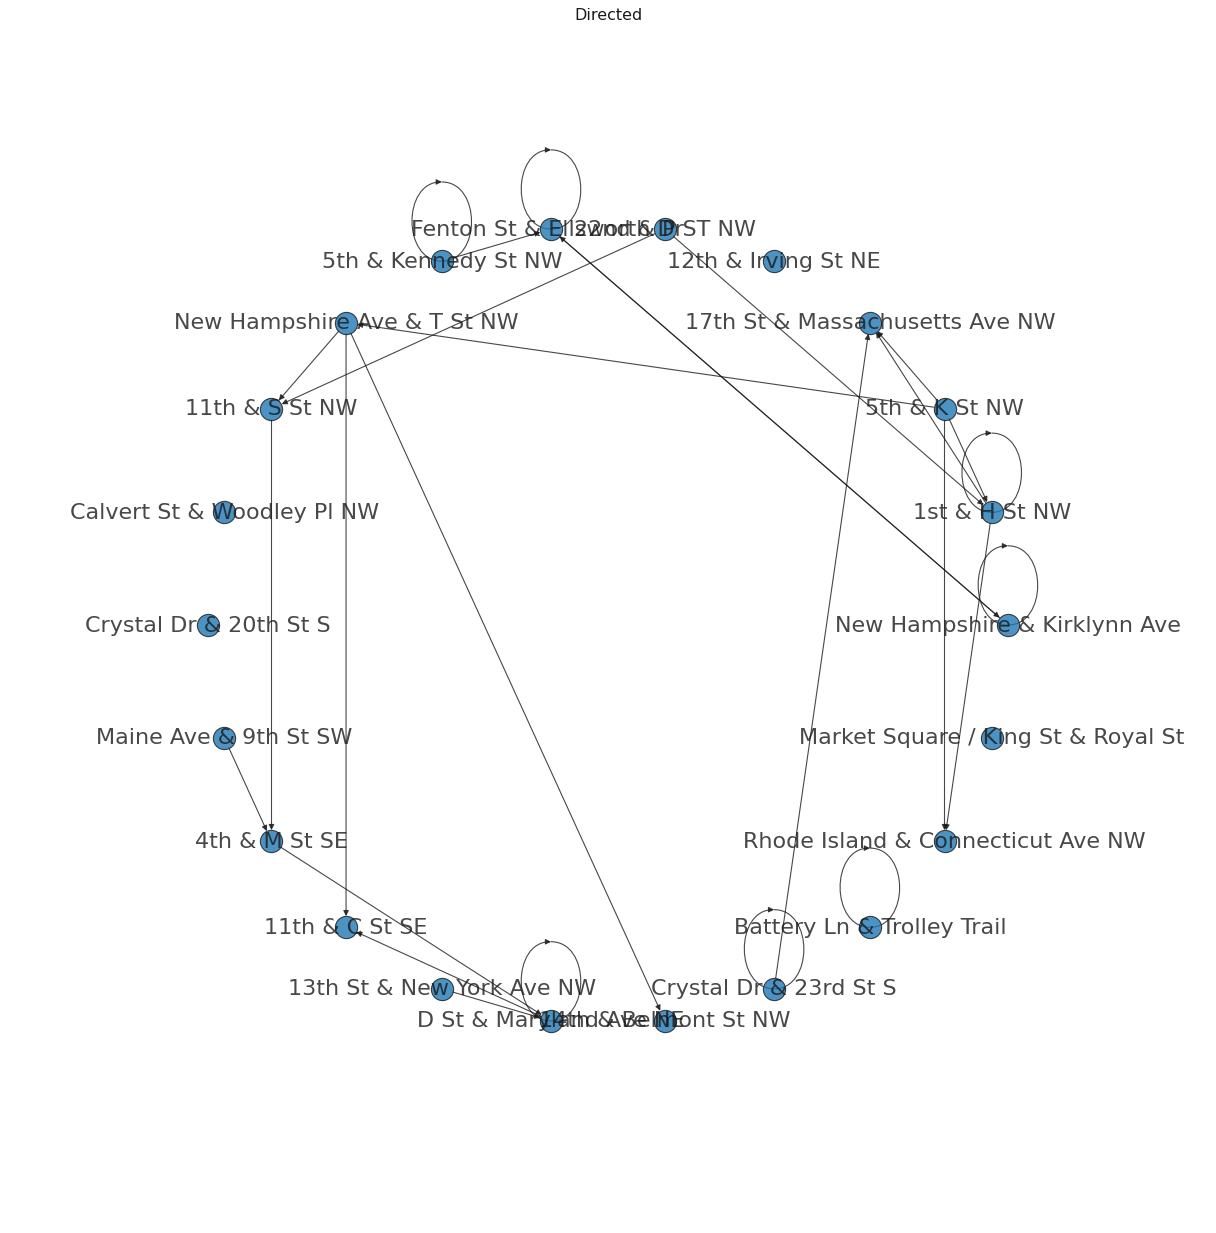

In [224]:
# Build your graph. Note that we use the DiGraph function to create the graph!
# https://www.python-graph-gallery.com/323-directed-or-undirected-network
G=nx.from_pandas_edgelist(data4.head(300), 'start_station_name', 'end_station_name', create_using=nx.DiGraph(), )

to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 5]

for x in to_be_removed:
    G.remove_node(x)

# Make the graph
plt.figure(figsize=(15, 15))


nx.draw(G, with_labels=True, font_size=20, node_size=400, alpha=0.8, arrows=True, pos=nx.circular_layout(G))
plt.title("Directed")
plt.show()

### 3. Percentage of trips per member type

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49790 entries, B3FA23181ADC06FE to 56B80D92A24B8C93
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   rideable_type            49790 non-null  object         
 1   started_at               49790 non-null  datetime64[ns] 
 2   ended_at                 49790 non-null  datetime64[ns] 
 3   start_station_name       49790 non-null  object         
 4   start_station_id         49790 non-null  float64        
 5   end_station_name         49790 non-null  object         
 6   end_station_id           49790 non-null  float64        
 7   start_lat                49790 non-null  float64        
 8   start_lng                49790 non-null  float64        
 9   end_lat                  49790 non-null  float64        
 10  end_lng                  49790 non-null  float64        
 11  member_casual            49790 non-null  object         
 1

In [213]:
data5 = df['member_casual'].value_counts(normalize=True).reset_index()
data5.columns = ['member_typ', 'value_counts']
data5['%'] = data5['value_counts']*100
data5.head()


,member_typ,value_counts,%
0,member,0.55959,55.959028
1,casual,0.44041,44.040972


In [214]:
plt.figure(figsize=(18, 12))

sns.barplot(data=df, x='member_casual', y='rental_duration__minutes')

ValueError: Could not interpret input 'rental_duration__minutes'

<Figure size 1440x960 with 0 Axes>

In [ ]:
plt.figure(figsize=(18, 12))

sns.barplot(data=df, x='member_casual', y='rental_duration__minutes', hue='rideable_type')


In [ ]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg_4)

ax = sns.barplot(x='hour', y='%', data=data5)

ax.set(title = 'Percentage wise user distribution', ylabel= 'Percentage of total rental bikes');

### 4. Percentage of trips / bike type.


In [ ]:
data6 = df['rideable_type'].value_counts(normalize=True).reset_index()
data6.columns = ['Bike Type', 'Counts']
data6['%'] = data6['Counts']*100

data6.head()

In [ ]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg_4)

ax = sns.barplot(x='Bike Type', y='%', data=data6)

ax.set(title = 'Percentage wise bike type distribution', ylabel= 'Percentage of total rental bikes');

In [ ]:
list_columns(data6)

In [ ]:
sns.set(rc={'figure.figsize':(16,5)}, )
plt.style.use(pg_4)

ax = sns.barplot(x='Bike Type', y='%', data=data6)

ax.set(title = 'Percentage wise bike type distribution', ylabel= 'Percentage of total rental bikes');

In [ ]:
list_columns(df)

In [ ]:
df.head()